In [120]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer


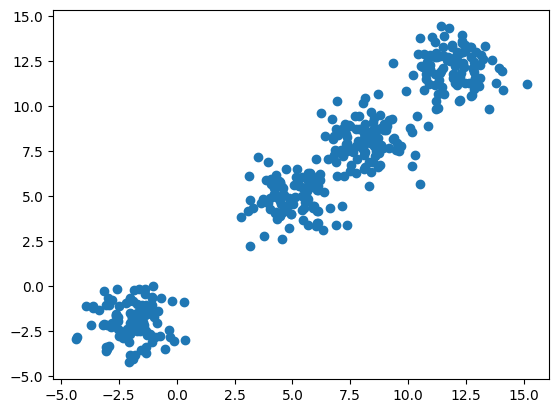

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


In [50]:

df = pd.read_table('kmeans.1.csv', delimiter=',')
plt.scatter(df['A'], df['B'])
plt.show()
df

In [51]:
X_ = ((df-df.min())/(df.max()-df.min()))
X_

,A,B
0,0.067984,0.047531
1,0.089996,0.141370
2,0.154003,0.217274
3,0.070053,0.039205
4,0.135982,0.174007
...,...,...
395,0.808373,0.861954
396,0.748874,0.856455
397,0.801689,0.908569
398,0.795829,0.858399


In [52]:
X_k = KMeans(n_clusters=4).fit(X_)
centers = X_k.cluster_centers_
centers

array([[0.64504777, 0.66137917],
       [0.12488096, 0.1225848 ],
       [0.83902637, 0.87789952],
       [0.48395258, 0.49330798]])

In [53]:
inertia = X_k.inertia_
inertia

2.176114977897748

In [54]:
labels = X_k.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2,

In [55]:
X_init = KMeans(n_clusters=4, init='random').fit(X_)
print(X_init.labels_)
print('\n')
X_ninit = KMeans(n_clusters=4, n_init=3).fit(X_)
print(X_ninit.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

{1: 60.002083008286725, 2: 15.793568251801187, 3: 4.777830629096787, 4: 2.176114977897748, 5: 1.9712137505436491, 6: 1.8240812184119792, 7: 1.6715173378460466, 8: 1.512525293074016}


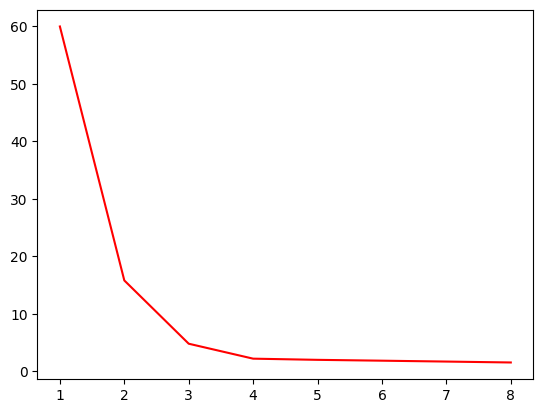

In [56]:
resultado = {}
for k in range(1, 9):
    X_kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X_)
    resultado[k] = X_kmeans.inertia_

print(resultado)

plt.figure()
plt.plot(list(resultado.keys()), list(resultado.values()), color='r')
plt.show()

In [57]:
df = pd.read_table('kmeans2.csv', delimiter=',')
df

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,79,89.0,35.8,15.0,3.0,121.0,14.0,21.0
1,35,96.0,36.4,15.0,2.0,121.0,16.0,33.0
2,25,98.0,35.5,15.0,2.0,121.0,18.0,17.0
3,34,98.0,37.0,15.0,2.0,121.0,18.0,1.0
4,45,98.0,36.8,15.0,2.0,121.0,18.0,11.0
...,...,...,...,...,...,...,...,...
129984,8,99.0,36.1,15.0,1.0,75.0,14.0,1.0
129985,24,99.0,36.1,15.0,1.0,75.0,14.0,1.0
129986,52,97.0,36.5,15.0,1.0,75.0,18.0,1.0
129987,56,97.0,36.1,15.0,1.0,75.0,20.0,1.0


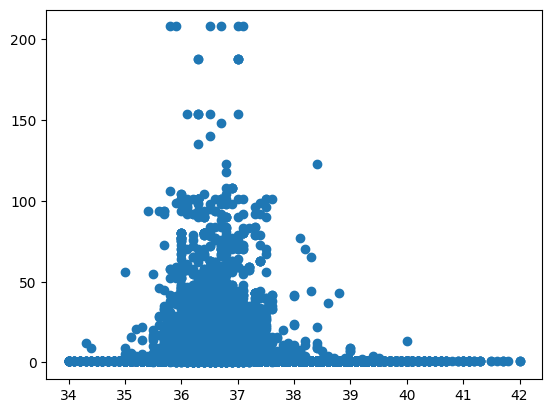

In [58]:
plt.scatter(df['TEMPERATURA'], df['DIAS_HOSP'])
plt.show()

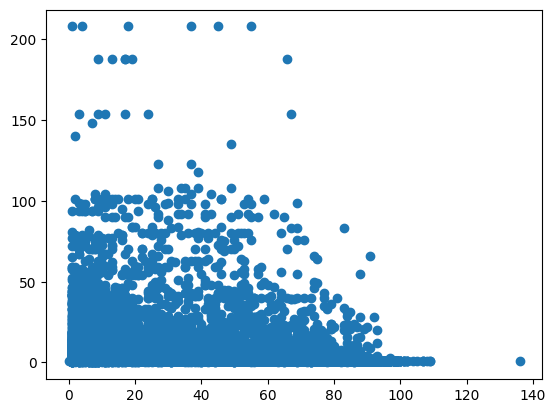

In [59]:
plt.scatter(df['PAC_EDAD'], df['DIAS_HOSP'])
plt.show()

In [114]:
# X = df[['PAC_EDAD', 'DIAS_HOSP']]
X_ = ((df-df.min())/(df.max()-df.min()))
X_

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,0.580882,0.89,0.2250,1.0,0.222222,0.187075,0.114583,0.100962
1,0.257353,0.96,0.3000,1.0,0.111111,0.187075,0.135417,0.158654
2,0.183824,0.98,0.1875,1.0,0.111111,0.187075,0.156250,0.081731
3,0.250000,0.98,0.3750,1.0,0.111111,0.187075,0.156250,0.004808
4,0.330882,0.98,0.3500,1.0,0.111111,0.187075,0.156250,0.052885
...,...,...,...,...,...,...,...,...
129984,0.058824,0.99,0.2625,1.0,0.000000,0.108844,0.114583,0.004808
129985,0.176471,0.99,0.2625,1.0,0.000000,0.108844,0.114583,0.004808
129986,0.382353,0.97,0.3125,1.0,0.000000,0.108844,0.156250,0.004808
129987,0.411765,0.97,0.2625,1.0,0.000000,0.108844,0.177083,0.004808


In [118]:
X_k = KMeans(n_clusters=4).fit(X_)
centers = X_k.cluster_centers_
centers

labels = X_k.labels_
print(labels)

[2 1 1 ... 1 2 1]


{1: 14469.699238126128, 2: 10314.76791541769, 3: 7754.499181352406, 4: 6641.003581484509, 5: 6070.606186155174, 6: 5085.507095680146, 7: 4732.810130645131, 8: 4530.585558245607, 9: 4328.90520975266, 10: 4114.057988871747, 11: 3846.1028697184634, 12: 3700.4042461025565}


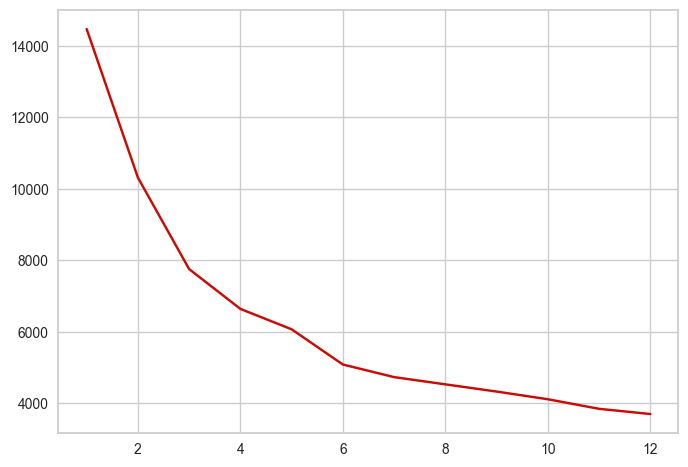

In [119]:
resultado = {}
for k in range(1, 13):
    X_kmeans = KMeans(n_clusters=k, random_state=0).fit(X_)
    resultado[k] = X_kmeans.inertia_

print(resultado)

plt.figure()
plt.plot(list(resultado.keys()), list(resultado.values()), color='r')
plt.show()

In [ ]:
model = KMeans(n_clusters=5, random_state=0)
#plot = silhouette_score(X_, model.fit_predict(X_))
plot = SilhouetteVisualizer(model)
plot.fit(X_)
plot.show()


In [ ]:
for k in range(1, 4):
    X_kmeans = KMeans(n_clusters=k, random_state=1).fit(X_)
    labels = X_kmeans.labels_
    index = davies_bouldin_score(X=X_, labels=labels)
    print(index)

In [133]:
for k in range(1, 4):
    print(X_kmeans.cluster_centers_)

[[0.12985629 0.97487361 0.35218603 0.99819526 0.49453675 0.26967161
  0.16670057 0.00846081]
 [0.46746991 0.96441318 0.32111991 0.99272292 0.33203099 0.28473584
  0.15225125 0.00651654]
 [0.0902948  0.97375176 0.35478663 0.99883179 0.13098603 0.26268423
  0.16375036 0.0067456 ]]
[[0.12985629 0.97487361 0.35218603 0.99819526 0.49453675 0.26967161
  0.16670057 0.00846081]
 [0.46746991 0.96441318 0.32111991 0.99272292 0.33203099 0.28473584
  0.15225125 0.00651654]
 [0.0902948  0.97375176 0.35478663 0.99883179 0.13098603 0.26268423
  0.16375036 0.0067456 ]]
[[0.12985629 0.97487361 0.35218603 0.99819526 0.49453675 0.26967161
  0.16670057 0.00846081]
 [0.46746991 0.96441318 0.32111991 0.99272292 0.33203099 0.28473584
  0.15225125 0.00651654]
 [0.0902948  0.97375176 0.35478663 0.99883179 0.13098603 0.26268423
  0.16375036 0.0067456 ]]


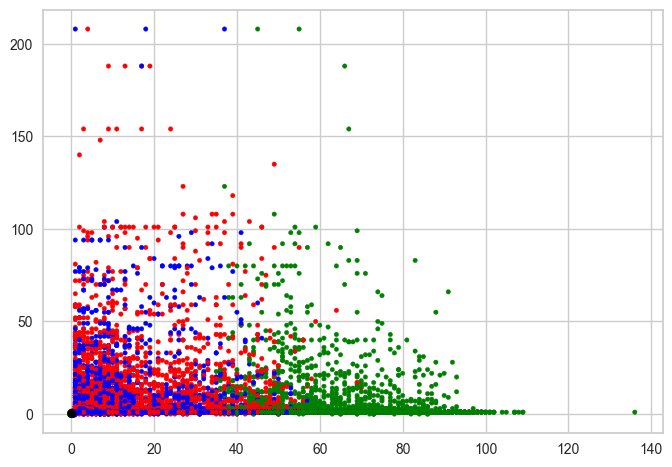

In [ ]:

colores=['red','green','blue', 'black']
asignar=[]
for row in X_kmeans.predict(X_):
    asignar.append(colores[row])


f1 = df['PAC_EDAD'].values
f2 = df['DIAS_HOSP'].values
 
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(centers[:, 0], centers[:, 5], marker='.', c=colores, s=150)
plt.show()